## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0712 01:51:24.346619  4232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 01:51:24.376621  4232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 01:51:24.383621  4232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0712 01:51:24.550631  4232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 01:51:24.573632  4232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0712 01:51:24.863645  4232 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 01:51:25.055653  4232 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 234us/step - loss: 2.2593 - acc: 0.1655 - val_loss: 2.2064 - val_acc: 0.2225
Epoch 2/500
50000/50000 [==============================] - 11s 218us/step - loss: 2.1716 - acc: 0.2421 - val_loss: 2.1374 - val_acc: 0.2605
Epoch 3/500
50000/50000 [==============================] - 10s 206us/step - loss: 2.1105 - acc: 0.2702 - val_loss: 2.0838 - val_acc: 0.2869
Epoch 4/500
50000/50000 [==============================] - 11s 211us/step - loss: 2.0623 - acc: 0.2852 - val_loss: 2.0408 - val_acc: 0.2875
Epoch 5/500
50000/50000 [==============================] - 10s 202us/step - loss: 2.0246 - acc: 0.2960 - val_loss: 2.0071 - val_acc: 0.3101
Epoch 6/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.9935 - acc: 0.3074 - val_loss: 1.9785 - val_acc: 0.3107
Epoch 7/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.9669 - acc: 0.3156 - val_l

Epoch 59/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.6402 - acc: 0.4293 - val_loss: 1.6461 - val_acc: 0.4245
Epoch 60/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.6375 - acc: 0.4304 - val_loss: 1.6423 - val_acc: 0.4226
Epoch 61/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.6345 - acc: 0.4306 - val_loss: 1.6405 - val_acc: 0.4267
Epoch 62/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.6312 - acc: 0.4320 - val_loss: 1.6385 - val_acc: 0.4241
Epoch 63/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.6287 - acc: 0.4349 - val_loss: 1.6354 - val_acc: 0.4290
Epoch 64/500
50000/50000 [==============================] - 10s 207us/step - loss: 1.6258 - acc: 0.4350 - val_loss: 1.6360 - val_acc: 0.4276
Epoch 65/500
50000/50000 [==============================] - 10s 209us/step - loss: 1.6230 - acc: 0.4354 - val_loss: 1.6324 - val_acc: 0.4248
Epoch 66/500
50000

50000/50000 [==============================] - 10s 207us/step - loss: 1.5110 - acc: 0.4724 - val_loss: 1.5391 - val_acc: 0.4578
Epoch 116/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.5090 - acc: 0.4740 - val_loss: 1.5352 - val_acc: 0.4621
Epoch 117/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.5067 - acc: 0.4727 - val_loss: 1.5329 - val_acc: 0.4625
Epoch 118/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.5053 - acc: 0.4747 - val_loss: 1.5321 - val_acc: 0.4626
Epoch 119/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.5034 - acc: 0.4748 - val_loss: 1.5325 - val_acc: 0.4608
Epoch 120/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.5019 - acc: 0.4753 - val_loss: 1.5292 - val_acc: 0.4609
Epoch 121/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.5003 - acc: 0.4757 - val_loss: 1.5285 - val_acc: 0.4644
Epoch 122/500
50000/5000

50000/50000 [==============================] - 6s 114us/step - loss: 1.4156 - acc: 0.5053 - val_loss: 1.4726 - val_acc: 0.4809
Epoch 174/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4140 - acc: 0.5065 - val_loss: 1.4809 - val_acc: 0.4802
Epoch 175/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4122 - acc: 0.5073 - val_loss: 1.4662 - val_acc: 0.4812
Epoch 176/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.4106 - acc: 0.5083 - val_loss: 1.4701 - val_acc: 0.4793
Epoch 177/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4090 - acc: 0.5076 - val_loss: 1.4648 - val_acc: 0.4830
Epoch 178/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4078 - acc: 0.5078 - val_loss: 1.4642 - val_acc: 0.4801
Epoch 179/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.4064 - acc: 0.5080 - val_loss: 1.4666 - val_acc: 0.4792
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 1.3334 - acc: 0.5333 - val_loss: 1.4205 - val_acc: 0.4970
Epoch 232/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3321 - acc: 0.5340 - val_loss: 1.4403 - val_acc: 0.4865
Epoch 233/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3309 - acc: 0.5331 - val_loss: 1.4276 - val_acc: 0.4962
Epoch 234/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3295 - acc: 0.5351 - val_loss: 1.4221 - val_acc: 0.4957
Epoch 235/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3283 - acc: 0.5342 - val_loss: 1.4181 - val_acc: 0.4998
Epoch 236/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3267 - acc: 0.5350 - val_loss: 1.4153 - val_acc: 0.4969
Epoch 237/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3255 - acc: 0.5363 - val_loss: 1.4155 - val_acc: 0.4968
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 1.2616 - acc: 0.5577 - val_loss: 1.3878 - val_acc: 0.5069
Epoch 290/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2610 - acc: 0.5560 - val_loss: 1.3890 - val_acc: 0.5095
Epoch 291/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2591 - acc: 0.5578 - val_loss: 1.3919 - val_acc: 0.5070
Epoch 292/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2583 - acc: 0.5586 - val_loss: 1.3795 - val_acc: 0.5124
Epoch 293/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2572 - acc: 0.5568 - val_loss: 1.3818 - val_acc: 0.5081
Epoch 294/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.2559 - acc: 0.5580 - val_loss: 1.3860 - val_acc: 0.5058
Epoch 295/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.2545 - acc: 0.5584 - val_loss: 1.3839 - val_acc: 0.5120
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 1.1955 - acc: 0.5795 - val_loss: 1.3762 - val_acc: 0.5033
Epoch 348/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1935 - acc: 0.5801 - val_loss: 1.3578 - val_acc: 0.5200
Epoch 349/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1932 - acc: 0.5801 - val_loss: 1.3659 - val_acc: 0.5177
Epoch 350/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1925 - acc: 0.5814 - val_loss: 1.3753 - val_acc: 0.5077
Epoch 351/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.1919 - acc: 0.5809 - val_loss: 1.3738 - val_acc: 0.5105
Epoch 352/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1902 - acc: 0.5816 - val_loss: 1.3557 - val_acc: 0.5201
Epoch 353/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.1902 - acc: 0.5815 - val_loss: 1.3648 - val_acc: 0.5164
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 6s 112us/step - loss: 1.1340 - acc: 0.6017 - val_loss: 1.3443 - val_acc: 0.5240
Epoch 406/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1323 - acc: 0.6024 - val_loss: 1.3425 - val_acc: 0.5239
Epoch 407/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.1325 - acc: 0.6014 - val_loss: 1.3511 - val_acc: 0.5237
Epoch 408/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1309 - acc: 0.6031 - val_loss: 1.3627 - val_acc: 0.5150
Epoch 409/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.1285 - acc: 0.6053 - val_loss: 1.3579 - val_acc: 0.5233
Epoch 410/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1285 - acc: 0.6033 - val_loss: 1.3795 - val_acc: 0.5145
Epoch 411/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1281 - acc: 0.6042 - val_loss: 1.4202 - val_acc: 0.5023
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 1.0770 - acc: 0.6218 - val_loss: 1.3789 - val_acc: 0.5178
Epoch 464/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.0746 - acc: 0.6240 - val_loss: 1.3587 - val_acc: 0.5242
Epoch 465/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0723 - acc: 0.6248 - val_loss: 1.3577 - val_acc: 0.5228
Epoch 466/500
50000/50000 [==============================] - 5s 109us/step - loss: 1.0729 - acc: 0.6240 - val_loss: 1.3998 - val_acc: 0.5103
Epoch 467/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0745 - acc: 0.6230 - val_loss: 1.3585 - val_acc: 0.5255
Epoch 468/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0730 - acc: 0.6227 - val_loss: 1.3312 - val_acc: 0.5336
Epoch 469/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0663 - acc: 0.6250 - val_loss: 1.3430 - val_acc: 0.5276
Epoch 470/500
50000/50000 [

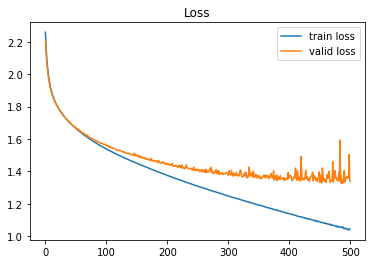

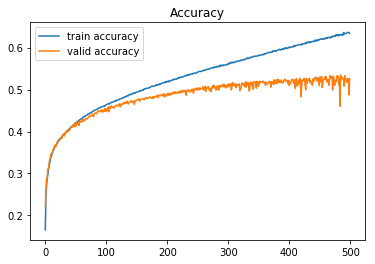

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()